# Main file for executions

In [1]:
from src.load_data import get_data
from src.train import FederatedLearning
from src.config import Config, load_train_config

## Specify parameters

### Manually set config

In [2]:
kwargs = {
    # Main mode
    "mode": "classification",  # prediction or classification

    # Model config
    "model": "LSTM",  # LSTM or RNN
    # "hidden_dim": 32,
    "num_layers": 1,
    "dropout": 0.0,

    # Training config
    "epochs": 300,
    "lr": 0.01,
    "batch_size": 128
}

config = Config(**kwargs)

In [63]:
# Save config
# config.save("default_pred_rnn")

Config saved in: config/config_default_pred_rnn.json


### Load saved config

In [8]:
config = load_train_config("config_default_class_lstm")
print(config)

Config loaded from: config/config_default_pred_lstm.json
CONFIG:
  mode: prediction
  test_size: 0.2
  val_size: 0.1
  shuffle: True
  seed: 42
  model: LSTM
  input_dim: 1
  hidden_dim: 32
  output_dim: 1
  num_layers: 1
  dropout: 0.0
  epochs: 1000
  lr: 0.01
  batch_size: 128
  eval_steps: 50


## Run FL training

In [9]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

In [10]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

Epoch: 0,  train loss: 115.48061, val loss: 640.08856


KeyboardInterrupt: 

### Analysis

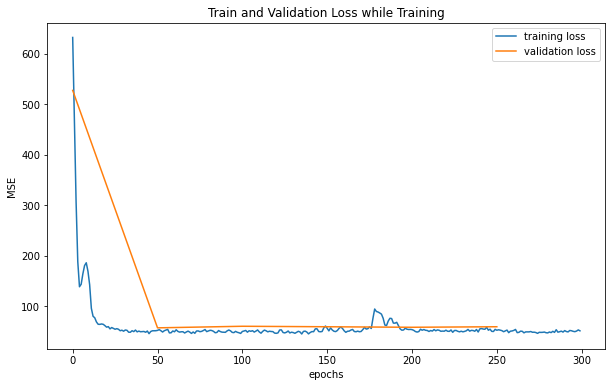

In [5]:
fl.plot_training_loss()

In [6]:
fl.evaluate(x_test, y_test)

C:\Users\Felix\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([3600, 1])) that is different to the input size (torch.Size([50, 72])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (50) must match the size of tensor b (3600) at non-singleton dimension 0

## Run training with aggregated data

In [3]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

# Stack data to aggregate all households to one
x_train, x_val, x_test = [arr.reshape(1, arr.shape[0] * arr.shape[1], arr.shape[2]) for arr in [x_train, x_val, x_test]]
y_train, y_val, y_test = [arr.reshape(1, arr.shape[0] * arr.shape[1]) for arr in [y_train, y_val, y_test]]

In [4]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

Epoch: 0,  train loss: 676.44287, val loss: 596.11896
Epoch: 50,  train loss: 61.52497, val loss: 90.46538
Epoch: 100,  train loss: 74.51585, val loss: 100.18870
Epoch: 150,  train loss: 72.10987, val loss: 76.91852
Epoch: 200,  train loss: 55.04140, val loss: 67.91328
Epoch: 250,  train loss: 79.28790, val loss: 81.05444
Needed  0.01 minutes for training


### Analysis

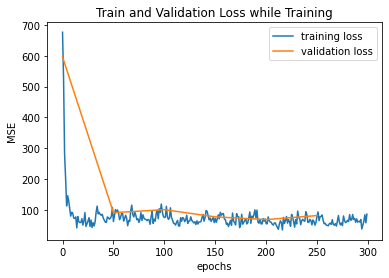

In [5]:
fl.plot_training_loss()

In [ ]:
fl.evaluate(x_test, y_test)